In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm #

from modules.models import ArcFaceModel
from modules.utils import load_json_dict


In [2]:
# Load test dataset

batch_size=64
shuffle=True
buffer_size=1000


_, (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_test = x_test/255.

In [3]:
# Load config
config_norm = load_json_dict("configs/test_norm.json")
config_norm

{'input_size': 28,
 'epochs': 10,
 'learning_rate': 0.005,
 'num_classes': 10,
 'embd_shape': 2,
 'backbone_type': 'Custom',
 'head_type': 'NormHead',
 'ckpt_name': 'test_norm'}

In [4]:
model_norm = ArcFaceModel(input_size=config_norm['input_size'],
                    backbone_type=config_norm['backbone_type'],
                    training=False)

In [5]:
# Compute embeddings before training

embeddings_before = model_norm(x_test).numpy()

In [7]:
# Load model weights

ckpt_path = tf.train.latest_checkpoint('./checkpoints/' + config_norm['ckpt_name'])
if ckpt_path is not None:
    model_norm.load_weights(ckpt_path)


In [9]:
embeddings_norm = model_norm(x_test).numpy()

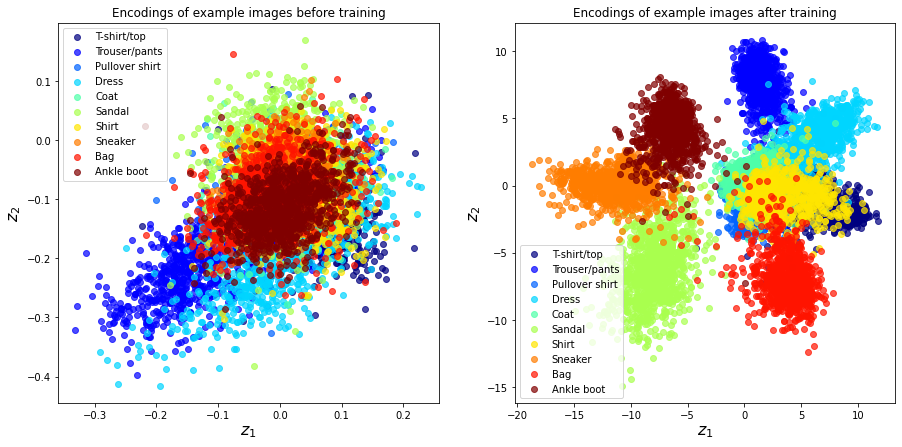

In [10]:
# Plot untrained and trained encodings

class_names = np.array(['T-shirt/top', 'Trouser/pants', 'Pullover shirt', 'Dress',
                        'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot'])

plt.figure(figsize=(15, 7))
cmap = cm.get_cmap('jet', 10)

plt.subplot(1, 2, 1)
for i, class_label in enumerate(class_names):
    inx = np.where(y_test == i)[0]
    plt.scatter(embeddings_before[inx, 0], embeddings_before[inx, 1],
                color=cmap(i), label=class_label, alpha=0.7)
plt.xlabel('$z_1$', fontsize=16) 
plt.ylabel('$z_2$', fontsize=16)
plt.title('Encodings of example images before training')
plt.legend()

plt.subplot(1, 2, 2)
for i, class_label in enumerate(class_names):
    inx = np.where(y_test == i)[0]
    plt.scatter(embeddings_norm[inx, 0], embeddings_norm[inx, 1],
                color=cmap(i), label=class_label, alpha=0.7)
plt.xlabel('$z_1$', fontsize=16) 
plt.ylabel('$z_2$', fontsize=16)
plt.title('Encodings of example images after training')
plt.legend()

plt.show()

# Arc norm

In [12]:
# Load config
config_arc = load_json_dict("configs/test_arc.json")
config_arc

{'input_size': 28,
 'epochs': 10,
 'learning_rate': 0.005,
 'num_classes': 10,
 'embd_shape': 2,
 'backbone_type': 'Custom',
 'head_type': 'ArcHead',
 'ckpt_name': 'test_arc'}

In [13]:
model_arc = ArcFaceModel(input_size=config_arc['input_size'],
                    backbone_type=config_arc['backbone_type'],
                    training=False)

In [14]:
# Compute embeddings before training

embeddings_before = model_arc(x_test).numpy()

In [15]:
# Load model weights

ckpt_path = tf.train.latest_checkpoint('./checkpoints/' + config_arc['ckpt_name'])
if ckpt_path is not None:
    model_arc.load_weights(ckpt_path)


In [16]:
embeddings_arc = model_arc(x_test).numpy()

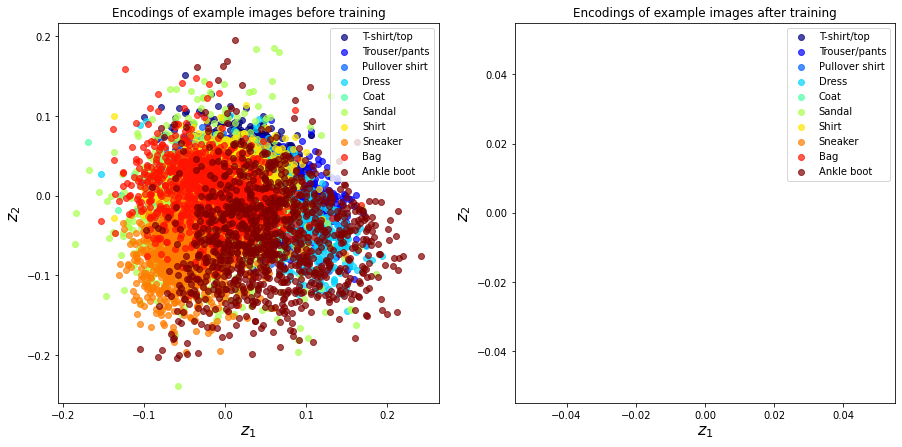

In [17]:
# Plot untrained and trained encodings

class_names = np.array(['T-shirt/top', 'Trouser/pants', 'Pullover shirt', 'Dress',
                        'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot'])

plt.figure(figsize=(15, 7))
cmap = cm.get_cmap('jet', 10)

plt.subplot(1, 2, 1)
for i, class_label in enumerate(class_names):
    inx = np.where(y_test == i)[0]
    plt.scatter(embeddings_before[inx, 0], embeddings_before[inx, 1],
                color=cmap(i), label=class_label, alpha=0.7)
plt.xlabel('$z_1$', fontsize=16) 
plt.ylabel('$z_2$', fontsize=16)
plt.title('Encodings of example images before training')
plt.legend()

plt.subplot(1, 2, 2)
for i, class_label in enumerate(class_names):
    inx = np.where(y_test == i)[0]
    plt.scatter(embeddings_arc[inx, 0], embeddings_arc[inx, 1],
                color=cmap(i), label=class_label, alpha=0.7)
plt.xlabel('$z_1$', fontsize=16) 
plt.ylabel('$z_2$', fontsize=16)
plt.title('Encodings of example images after training')
plt.legend()

plt.show()

In [18]:
embeddings_arc

array([[nan, nan],
       [nan, nan],
       [nan, nan],
       ...,
       [nan, nan],
       [nan, nan],
       [nan, nan]], dtype=float32)